## To Do

- GridSearch/Random Search for each model: 
- logistic regression
- decision tree
- neural network

- Repeat with PCA components
- Repeat with changes in features

- Compare across all models

In [1]:
import pickle

with open('xy_data.pickle', 'rb') as file:
    X_train, X_test, y_train, y_test = pickle.load(file)

In [49]:
import pandas as pd
import numpy as np

# Import plotting packages
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#plt.style.use('default')

In [51]:
# Establish a pipeline for a grid search

import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay


In [46]:
logreg_pipeline = make_pipeline(
    LogisticRegression(random_state=42)
)
grid_params = {
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['saga', 'liblinear'],
    'logisticregression__C': [0.01, 0.1, 1, 5],
    'logisticregression__max_iter': [500]
}

grid_search = GridSearchCV(logreg_pipeline, grid_params, cv=5)
grid_search.fit(X_train, y_train)
model_logreg = grid_search.best_estimator_


In [ ]:
# Detailed Search Results
a_results_df = pd.DataFrame(grid_search.cv_results_)
print(f"Score: {grid_search.best_score_}. Mean: {np.mean(a_results_df['mean_test_score'])} and STD {np.std(a_results_df['mean_test_score'])}")
print(f"Best Parameters: {grid_search.best_params_}")
display(a_results_df[['rank_test_score', 'mean_test_score', 'mean_fit_time', 'mean_score_time', 'params']].sort_values(by='rank_test_score'))


Score: 0.8200257263680661. Mean: 0.814467824459776 and STD 0.006546368411132473
Best Parameters: {'logisticregression__C': 1, 'logisticregression__max_iter': 500, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}


,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,params
12,1,0.820026,3.906515,0.008041,"{'logisticregression__C': 1, 'logisticregressi..."
16,2,0.819927,5.116320,0.008126,"{'logisticregression__C': 5, 'logisticregressi..."
14,3,0.819902,0.596775,0.007971,"{'logisticregression__C': 1, 'logisticregressi..."
18,4,0.819804,0.738622,0.008290,"{'logisticregression__C': 5, 'logisticregressi..."
19,5,0.819705,0.086689,0.007943,"{'logisticregression__C': 5, 'logisticregressi..."
17,6,0.819508,0.163446,0.008053,"{'logisticregression__C': 5, 'logisticregressi..."
15,7,0.819483,0.081400,0.008228,"{'logisticregression__C': 1, 'logisticregressi..."
10,8,0.819310,0.610128,0.007853,"{'logisticregression__C': 0.1, 'logisticregres..."
13,9,0.819211,0.126193,0.007780,"{'logisticregression__C': 1, 'logisticregressi..."
11,10,0.818940,0.067476,0.007861,"{'logisticregression__C': 0.1, 'logisticregres..."


0.814467824459776
0.006546368411132473


Accuracy: 0.825996841689696
Precision: 0.6447574334898278
Recall: 0.21149897330595482
F1 Score 0.3185156551990723
Specificity: 0.9722629521016618
Hamming Loss 0.174003158310304
ROC-AUC Score 0.7458825918153517


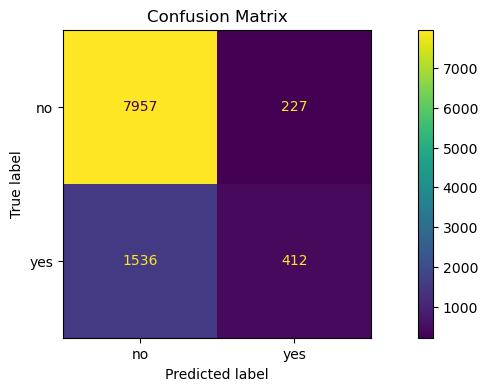

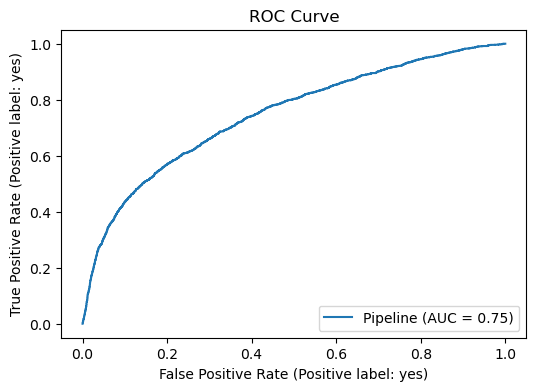

In [54]:
y_pred = model_logreg.predict(X_test)

plt.style.use('default')

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Print various metrics
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(f'Precision: {metrics.precision_score(y_true=y_test, y_pred=y_pred, pos_label="yes")}')
print(f'Recall: {metrics.recall_score(y_true=y_test, y_pred=y_pred, pos_label="yes")}')
print(f'F1 Score {metrics.f1_score(y_true=y_test, y_pred=y_pred, pos_label="yes")}')
print(f'Specificity: {tn / (tn + fp)}')
print(f'Hamming Loss {metrics.hamming_loss(y_true=y_test, y_pred=y_pred)}')


# Plot Confusion Matrix
class_labels = model_logreg.classes_
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot(ax=ax)
plt.show

# Plot the ROC curve
y_probabilities = model_logreg.predict_proba(X_test)[:, 1]
print(f'ROC-AUC Score {metrics.roc_auc_score(y_true=y_test, y_score=y_probabilities)}')
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title('ROC Curve')
roc_display = RocCurveDisplay.from_estimator(model_logreg, X_test, y_test, ax=ax, pos_label="yes")
plt.show()

plt.style.use('ggplot')

In [14]:
sklearn.set_config(display='diagram')
